In [15]:
!pip install numpy matplotlib scipy pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 10.7 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 kB 10.7 MB/s eta 0:00:00 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 13.1 MB/s eta 0:00:00


In [16]:
import matplotlib.pyplot as plt;
import numpy as np;
from scipy.interpolate import UnivariateSpline
import pandas as pd
import glob
import os
from values import *

In [91]:
df = pd.read_csv("/home/ashwin/z_xHI_7.0000", sep=" ", header=None, 
                 names=["z", "xHI"])
 

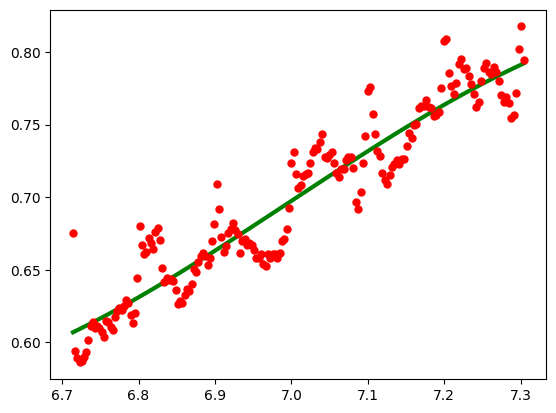

In [96]:
z=df["z"]
xH=df["xHI"]

spl = UnivariateSpline(z,xH,k=3)
xs = np.linspace(min(z), max(z), 100)
plt.plot(xs, spl(xs), 'g', lw=3)
plt.plot(z, xH, 'ro', ms=5)

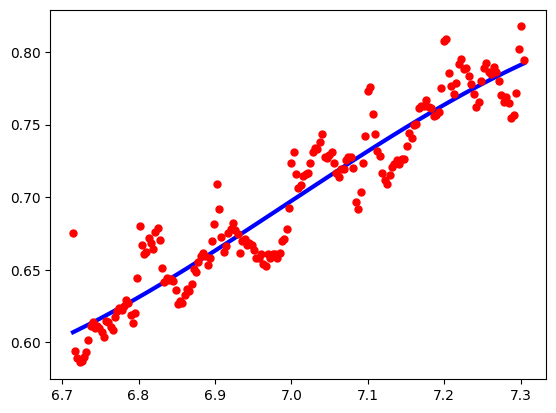

In [101]:
spl.set_smoothing_factor(0.1)
plt.plot(xs, spl(xs), 'b', lw=3)
plt.plot(z, xH, 'ro', ms=5)

In [66]:
location_home=os.getcwd()

In [67]:
os.chdir(location_home)
os.chdir("../Save/Run")



FileNotFoundError: [Errno 2] No such file or directory: '../Save/Run'

In [74]:
files = glob.glob("nion/*/lightcone/z_xHI_*",recursive=True)
print(files)

['nion/15/lightcone/z_xHI_8.7459', 'nion/16/lightcone/z_xHI_8.7459', 'nion/17/lightcone/z_xHI_8.7459']


In [87]:
# Extract folder names from file paths
nion = np.array( [os.path.basename(os.path.dirname(os.path.dirname(file))) for file in files],float )

print(nion)
print(files)

[15. 16. 17.]
['nion/15/lightcone/z_xHI_8.7459', 'nion/16/lightcone/z_xHI_8.7459', 'nion/17/lightcone/z_xHI_8.7459']


<function matplotlib.pyplot.show(close=None, block=None)>

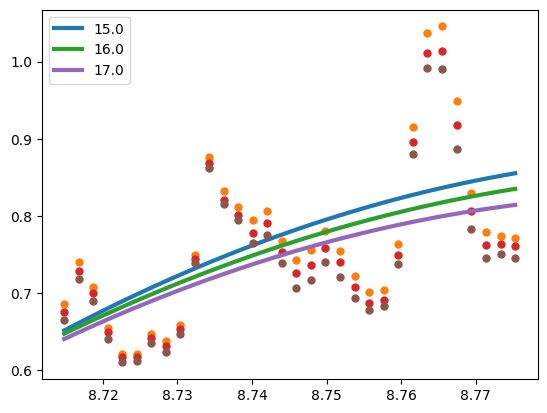

In [90]:
for i in range(len(nion)):
    df = pd.read_csv(files[i], sep=" ", header=None, 
                 names=["z", "xHI"])
    z=df["z"]
    xH=df["xHI"]

    spl = UnivariateSpline(z,xH,k=2)
    xs = np.linspace(min(z), max(z), 100)
    plt.plot(xs, spl(xs), lw=3, label=nion[i] )
    plt.plot(z, xH, 'o', ms=5)
    plt.legend()
plt.show()

In [103]:
!pip install yt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 MB 2.3 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 8.7 MB/s eta 0:00:00m eta 0:00:010:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.0/119.0 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.0/215.0 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 9.2 MB/s eta 0:00:00m eta 0:00:010:01:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 9.3 MB/s eta 0:00:0010.1 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 10.5 MB/s eta 0:00:0031m11.7 MB/s eta 0:00:01


In [ ]:
import yt
import numpy as np

In [119]:


N = 128

data = {"density": np.random.random((N, N, N))}

cell_widths = []
for i in range(3):
    widths = np.random.random(N)
    widths /= widths.sum()  # Normalize to span 0 .. 1.
    cell_widths.append(widths)

ds = yt.load_uniform_grid(
    data,
    [N, N, N],
    bbox=np.array([[0.0, 1.0], [0.0, 1.0], [0.0, 1.0]]),
    cell_widths=cell_widths,
)

yt : [INFO     ] 2024-04-01 00:28:11,114 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-04-01 00:28:11,115 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2024-04-01 00:28:11,115 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-04-01 00:28:11,116 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2024-04-01 00:28:11,116 Parameters: cosmological_simulation   = 0


In [120]:
sc = yt.create_scene(ds, lens_type="perspective")
source = sc[0]


yt : [INFO     ] 2024-04-01 00:28:21,759 Setting default field to ('gas', 'density')


In [121]:
sc.save("rendering.png", sigma_clip=6.0)


yt : [WARNING  ] 2024-04-01 00:28:23,204 No previously rendered image found, rendering now.
yt : [INFO     ] 2024-04-01 00:28:23,205 Rendering scene (Can take a while).
yt : [INFO     ] 2024-04-01 00:28:23,207 Creating volume
yt : [INFO     ] 2024-04-01 00:28:23,301 Creating transfer function
yt : [INFO     ] 2024-04-01 00:28:23,302 Calculating data bounds. This may take a while. Set the TransferFunctionHelper.bounds to avoid this.
yt : [INFO     ] 2024-04-01 00:28:29,640 Saving rendered image to rendering.png


In [122]:
sc.save("rendering.png", sigma_clip=4.0)


yt : [WARNING  ] 2024-04-01 00:29:26,162 Previously rendered image exists, but rendering anyway. Supply 'render=False' to save previously rendered image directly.
yt : [INFO     ] 2024-04-01 00:29:26,163 Rendering scene (Can take a while).
yt : [INFO     ] 2024-04-01 00:29:32,658 Saving rendered image to rendering.png


In [114]:
!pwd

/home/ashwin


In [113]:
os.chdir("..")


In [126]:
np.random.random((N, N, N))

array([[[0.78694605, 0.4836522 , 0.64285732, ..., 0.95412114,
         0.5690626 , 0.92954875],
        [0.28630294, 0.96403294, 0.90348624, ..., 0.01746731,
         0.45592282, 0.70110659],
        [0.46699366, 0.14006658, 0.05890794, ..., 0.63183296,
         0.80300602, 0.20832189],
        ...,
        [0.05589984, 0.5789852 , 0.58912645, ..., 0.19250682,
         0.57817027, 0.32924058],
        [0.47334125, 0.15755846, 0.28349641, ..., 0.86533024,
         0.38753367, 0.8541965 ],
        [0.22800923, 0.07347137, 0.29631252, ..., 0.92218522,
         0.39947332, 0.21528578]],

       [[0.7792077 , 0.94602359, 0.24082523, ..., 0.24628295,
         0.21950488, 0.43004557],
        [0.09940418, 0.21741414, 0.62046616, ..., 0.52564787,
         0.01353862, 0.60022505],
        [0.96073056, 0.78760206, 0.122139  , ..., 0.88703722,
         0.80946062, 0.75785316],
        ...,
        [0.54658401, 0.72661603, 0.12492287, ..., 0.65035108,
         0.23038161, 0.84945515],
        [0.5